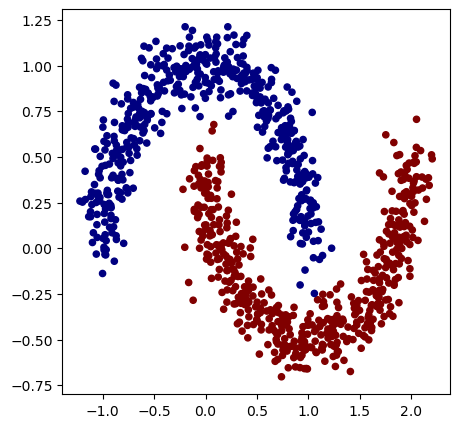

In [1]:
from matplotlib import pyplot as plt
from sklearn.datasets import make_moons, make_blobs
X, y = make_moons(n_samples=1000, noise=0.1)

# visualize in 2D
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')

now loss =  0.7073112481885071  accuracy =  0.202
now loss =  0.691565657129338  accuracy =  0.417
now loss =  0.6788602666433456  accuracy =  0.646
now loss =  0.6615254708203161  accuracy =  0.763
now loss =  0.6570539791361032  accuracy =  0.772
now loss =  0.6301065974258506  accuracy =  0.776
now loss =  0.6395194581230373  accuracy =  0.785
now loss =  0.5856016127669648  accuracy =  0.785
now loss =  0.6164369858143058  accuracy =  0.792
now loss =  0.5814863592996704  accuracy =  0.796
now loss =  0.5676035638216954  accuracy =  0.806
now loss =  0.5676045802379438  accuracy =  0.808
now loss =  0.5631198465630296  accuracy =  0.811
now loss =  0.4976473935937441  accuracy =  0.811
now loss =  0.5538979516542724  accuracy =  0.817
now loss =  0.5037997015379843  accuracy =  0.819
now loss =  0.512026079583806  accuracy =  0.822
now loss =  0.4831926012514014  accuracy =  0.826
now loss =  0.46001096119797646  accuracy =  0.827
now loss =  0.41694847696713555  accuracy =  0.829


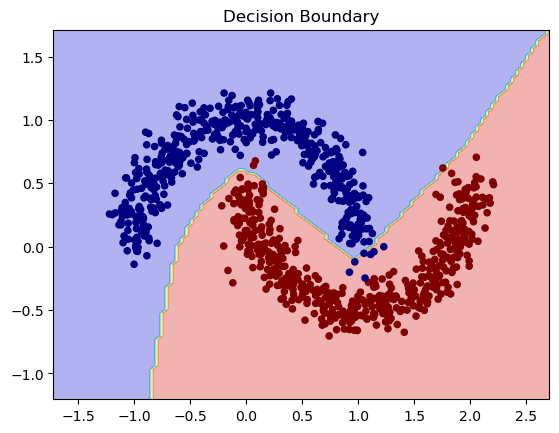

In [2]:
import numpy as np
from layers import Affine, Relu, Sigmoid
from model import Model
nn = Model(layers=[Affine(20), Relu(), Affine(20), Relu(), Affine(1), Sigmoid()])

targets = np.reshape(y, (y.shape[0], 1))
nn.fit(X, targets, n_epochs=500, lr=1e-3)


# Create a mesh grid for plotting decision boundary
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict class for each point in the grid
Z = nn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Predict on the original data
y_pred = nn.predict(X)
print("pred = ", [format(x[0], '.3f') for x in y_pred[:10]])
# Threshold predictions to get binary labels
y_pred_labels = (y_pred > 0.5).astype(int).flatten()

# Create a meshgrid for visualization
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predict with the model
mesh = np.c_[xx.ravel(), yy.ravel()]
mesh_predictions = nn.predict(mesh).round()
mesh_predictions = mesh_predictions.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, mesh_predictions, alpha=0.3, cmap='jet')
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap='jet')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Decision Boundary")
plt.show()

The following keras code doesn't work for some reason on my mac.
On Google Colab it runs fine

TensorFlow version: 2.15.0
Keras version: <module 'keras.api._v2.keras' from '/Users/eddiexie/miniconda3/envs/machine-learning/lib/python3.10/site-packages/keras/api/_v2/keras/__init__.py'>
Epoch 1/50
8/8 [==============================] - 0s 21ms/step - loss: 0.5242 - accuracy: 0.6980
Epoch 2/50
8/8 [==============================] - 0s 10ms/step - loss: 0.3394 - accuracy: 0.8300
Epoch 3/50
8/8 [==============================] - 0s 8ms/step - loss: 0.2892 - accuracy: 0.8610
Epoch 4/50
8/8 [==============================] - 0s 8ms/step - loss: 0.2806 - accuracy: 0.8710
Epoch 5/50
8/8 [==============================] - 0s 7ms/step - loss: 0.2733 - accuracy: 0.8740
Epoch 6/50
8/8 [==============================] - 0s 7ms/step - loss: 0.2677 - accuracy: 0.8800
Epoch 7/50
8/8 [==============================] - 0s 7ms/step - loss: 0.2642 - accuracy: 0.8820
Epoch 8/50
8/8 [==============================] - 0s 7ms/step - loss: 0.2632 - accuracy: 0.8830
Epoch 9/50
8/8 [========================

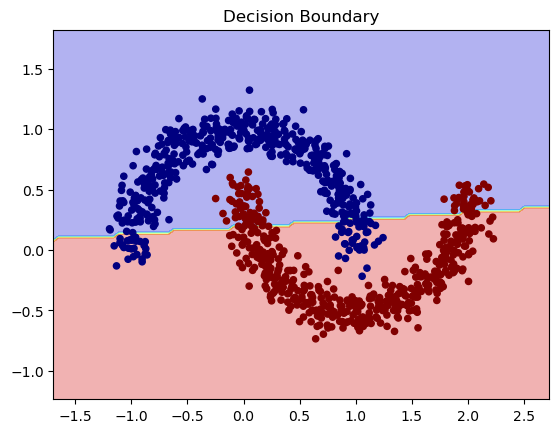

In [22]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, ReLU
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop

print("TensorFlow version:", tf.__version__)
print("Keras version:", keras)

# Prepare the data
X, y = make_moons(n_samples=1000, noise=0.1)

batch_size = 128

# Define the model using Functional API
inputs = Input(shape=(2,))
x = Dense(200)(inputs)
x = ReLU()(x)  # Using ReLU as a layer
x = Dense(200)(x)
x = ReLU()(x)  # Using ReLU as a layer
outputs = Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X, y, epochs=50, batch_size=batch_size)

print(model.predict(X)[:10])

# Create a meshgrid for visualization
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predict with the model
mesh = np.c_[xx.ravel(), yy.ravel()]
mesh_predictions = model.predict(mesh).round()
mesh_predictions = mesh_predictions.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, mesh_predictions, alpha=0.3, cmap='jet')
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap='jet')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Decision Boundary")
plt.show()


PyTorch version: 2.0.0
tensor([[3.8433e-03],
        [9.9948e-01],
        [9.8506e-01],
        [9.9999e-01],
        [9.9993e-01],
        [1.4835e-04],
        [1.1111e-04],
        [3.9472e-03],
        [9.9998e-01],
        [9.9995e-01]])


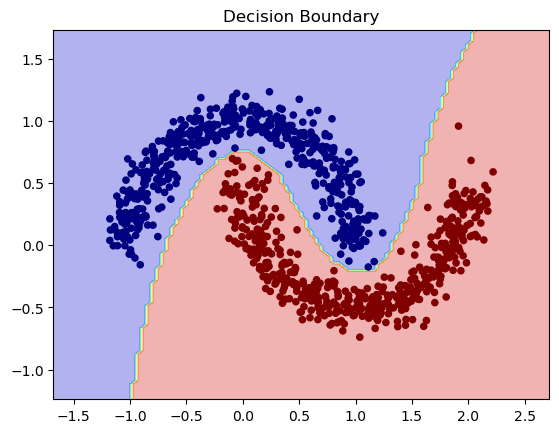

In [21]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

# Check PyTorch version
print("PyTorch version:", torch.__version__)

# Prepare the data
X, y = make_moons(n_samples=1000, noise=0.1)
X = torch.from_numpy(X).float()
y = torch.from_numpy(y).float().view(-1, 1)  # Reshape y to a column vector

batch_size = 128

# Define the model using PyTorch
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(2, 200)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(200, 200)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(200, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

model = Model()

# Compile the model
optimizer = optim.Adam(model.parameters(), lr=1e-3)
loss_function = nn.BCELoss()

# Train the model
for epoch in range(50):
    perm = torch.randperm(X.size(0))
    for i in range(0, X.size(0), batch_size):
        indices = perm[i:i + batch_size]
        batch_x, batch_y = X[indices], y[indices]

        optimizer.zero_grad()
        output = model(batch_x)
        loss = loss_function(output, batch_y)
        loss.backward()
        optimizer.step()

# Prediction on training data for demonstration
with torch.no_grad():
    print(model(X[:10]))

# Create a meshgrid for visualization
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predict with the model
mesh = torch.from_numpy(np.c_[xx.ravel(), yy.ravel()]).float()
with torch.no_grad():
    mesh_predictions = model(mesh).round()
mesh_predictions = mesh_predictions.numpy().reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, mesh_predictions, alpha=0.3, cmap='jet')
plt.scatter(X[:, 0].numpy(), X[:, 1].numpy(), c=y.numpy().squeeze(), s=20, cmap='jet')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Decision Boundary")
plt.show()
